# Film Data Analysis

## Initial Setup

In [163]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
import pandas as pd

In [164]:
# will be looking at a lot of tables, so make a report
def df_report(df):
    print(df.info())
    print('===========================================================\n')
    print(df.describe())
    print('===========================================================\n')
    print(df.head())

In [165]:
films = pd.read_csv('Data\\Reduced_Data\\films_2010.csv')

In [166]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63849 entries, 0 to 63848
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         63849 non-null  int64  
 1   primary_title      63849 non-null  object 
 2   year               63849 non-null  float64
 3   runtime_minutes    62741 non-null  float64
 4   genres             62322 non-null  object 
 5   movie_id           62741 non-null  object 
 6   writer             54128 non-null  object 
 7   director           62264 non-null  object 
 8   production_budget  2440 non-null   float64
 9   domestic_gross     4564 non-null   float64
 10  worldwide_gross    3372 non-null   float64
 11  studio             3381 non-null   object 
 12  foreign_gross      3398 non-null   float64
 13  averagerating      62783 non-null  float64
 14  numvotes           62779 non-null  float64
 15  log_numvotes       62115 non-null  float64
 16  actors             627

#### Get rid of what we don't need for the following analyses

In [167]:
drop_columns= ['Unnamed: 0', 'domestic_gross', 'worldwide_gross', 'foreign_gross', 'log_numvotes', 
              'ww_netprofit', 'ww_ppratio', 'f_netprofit', 'f_ppratio']
films = films.drop(drop_columns, axis=1)

In [168]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63849 entries, 0 to 63848
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      63849 non-null  object 
 1   year               63849 non-null  float64
 2   runtime_minutes    62741 non-null  float64
 3   genres             62322 non-null  object 
 4   movie_id           62741 non-null  object 
 5   writer             54128 non-null  object 
 6   director           62264 non-null  object 
 7   production_budget  2440 non-null   float64
 8   studio             3381 non-null   object 
 9   averagerating      62783 non-null  float64
 10  numvotes           62779 non-null  float64
 11  actors             62741 non-null  object 
 12  d_netprofit        2440 non-null   float64
 13  d_ppratio          2440 non-null   float64
dtypes: float64(7), object(7)
memory usage: 6.8+ MB


#### Get rid of the null data in the financial columns for all analyses

In [169]:
films = films[films.d_netprofit.notna()]

In [170]:
df_report(films)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 14 to 63144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2440 non-null   object 
 1   year               2440 non-null   float64
 2   runtime_minutes    2036 non-null   float64
 3   genres             2035 non-null   object 
 4   movie_id           2036 non-null   object 
 5   writer             1947 non-null   object 
 6   director           2030 non-null   object 
 7   production_budget  2440 non-null   float64
 8   studio             1235 non-null   object 
 9   averagerating      2019 non-null   float64
 10  numvotes           2019 non-null   float64
 11  actors             2036 non-null   object 
 12  d_netprofit        2440 non-null   float64
 13  d_ppratio          2440 non-null   float64
dtypes: float64(7), object(7)
memory usage: 285.9+ KB
None

              year  runtime_minutes  production_budget  average

---

---

## Analyzing d_pp_ratio by averagerating

In [171]:
# get rid of nulls in the ratings columns
films_dpp = films[films.averagerating.notna()]
films_dpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2019 entries, 14 to 63133
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2019 non-null   object 
 1   year               2019 non-null   float64
 2   runtime_minutes    1963 non-null   float64
 3   genres             1963 non-null   object 
 4   movie_id           1963 non-null   object 
 5   writer             1892 non-null   object 
 6   director           1961 non-null   object 
 7   production_budget  2019 non-null   float64
 8   studio             1181 non-null   object 
 9   averagerating      2019 non-null   float64
 10  numvotes           2019 non-null   float64
 11  actors             1963 non-null   object 
 12  d_netprofit        2019 non-null   float64
 13  d_ppratio          2019 non-null   float64
dtypes: float64(7), object(7)
memory usage: 236.6+ KB


In [172]:
def remove_outliers_iqr(df, var):
    """
    takes a df and a variable string as argument
    returns the df with outliers beyond the iqr in variable removed
    """
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[var] < (Q1 - 1.5 * IQR)) | (df[var] > (Q3 + 1.5 * IQR)))]

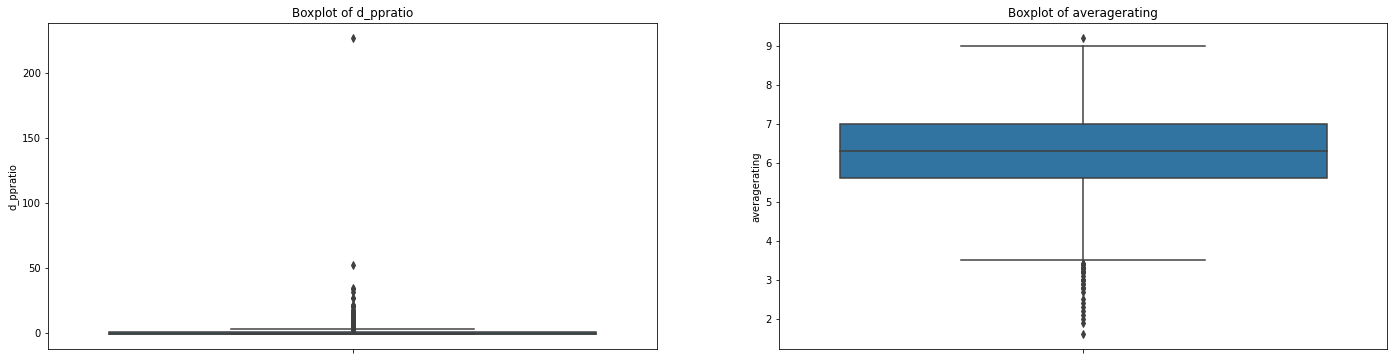

In [173]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(24, 6))

# First subplot for 'd_ppratio'
plt.subplot(1, 2, 1) # (rows, columns, panel number)
sns.boxplot(y='d_ppratio', data=films_dpp)
plt.title('Boxplot of d_ppratio')

# Second subplot for 'averagerating'
plt.subplot(1, 2, 2) # (rows, columns, panel number)
sns.boxplot(y='averagerating', data=films_dpp)
plt.title('Boxplot of averagerating')

# Display the plots
plt.show()

In [174]:
films_dpp = remove_outliers_iqr(films_dpp, 'd_ppratio')
films_dpp = remove_outliers_iqr(films_dpp, 'averagerating')

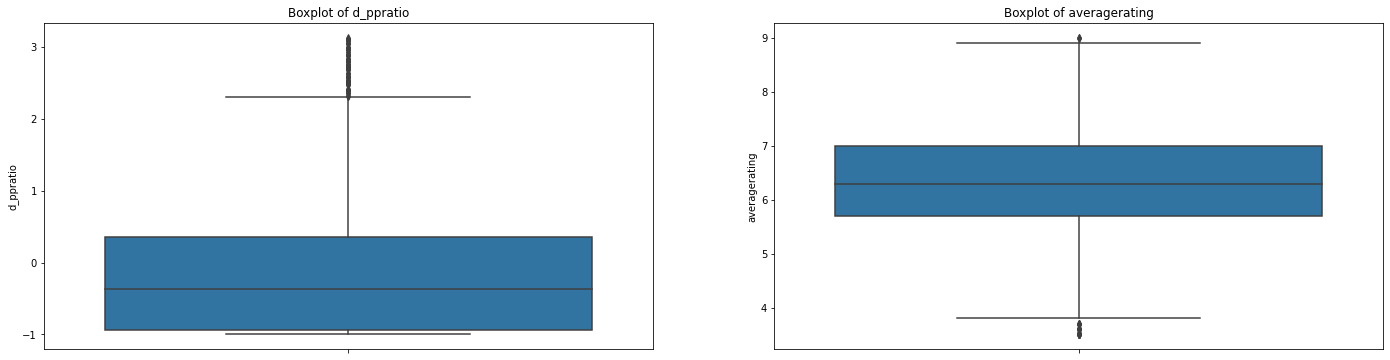

In [175]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(24, 6))

# First subplot for 'd_ppratio'
plt.subplot(1, 2, 1) # (rows, columns, panel number)
sns.boxplot(y='d_ppratio', data=films_dpp)
plt.title('Boxplot of d_ppratio')

# Second subplot for 'averagerating'
plt.subplot(1, 2, 2) # (rows, columns, panel number)
sns.boxplot(y='averagerating', data=films_dpp)
plt.title('Boxplot of averagerating')

# Display the plots
plt.show()

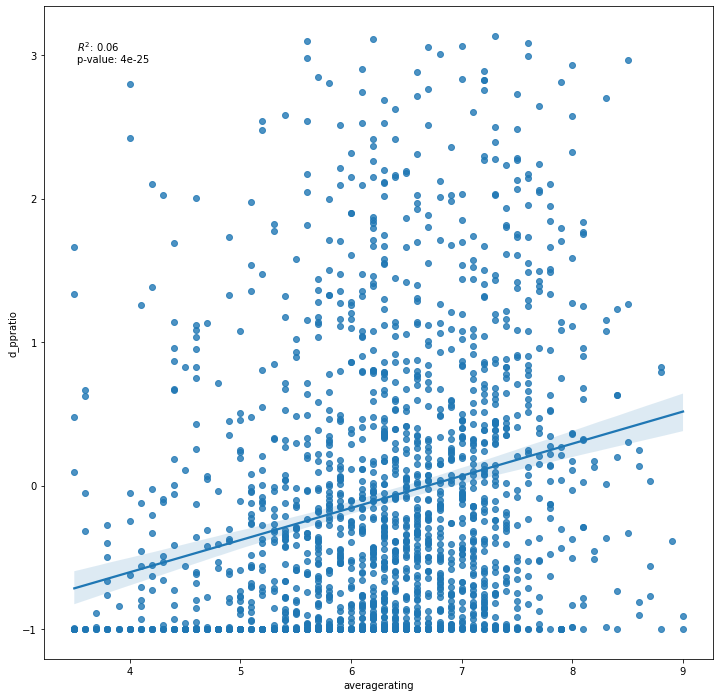

In [176]:
X = films_dpp['averagerating']
y = films_dpp['d_ppratio']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the r-squared and p-value
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the slope coefficient

# Set the size of the figure
plt.figure(figsize=(12, 12))

# Create a scatter plot with a regression line
sns.regplot(x='averagerating', y='d_ppratio', data=films_dpp)

# Annotate the plot with the r-squared and p-value
plt.text(0.05, 0.95, f'$R^2$: {r_squared:.2f}\np-value: {p_value:.2g}', 
         ha='left', va='top', transform=plt.gca().transAxes)

# Display the plot
plt.show()

In [177]:
films_dpp['ppratio_xform'] = np.sqrt(films_dpp.d_ppratio + 1.00001)

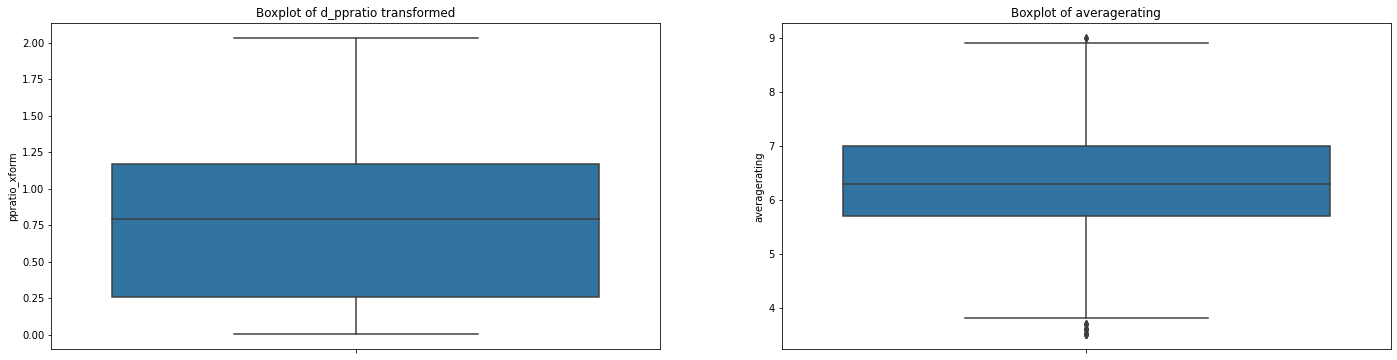

In [178]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(24, 6))

# First subplot for 'd_ppratio'
plt.subplot(1, 2, 1) # (rows, columns, panel number)
sns.boxplot(y='ppratio_xform', data=films_dpp)
plt.title('Boxplot of d_ppratio transformed')

# Second subplot for 'averagerating'
plt.subplot(1, 2, 2) # (rows, columns, panel number)
sns.boxplot(y='averagerating', data=films_dpp)
plt.title('Boxplot of averagerating')

# Display the plots
plt.show()

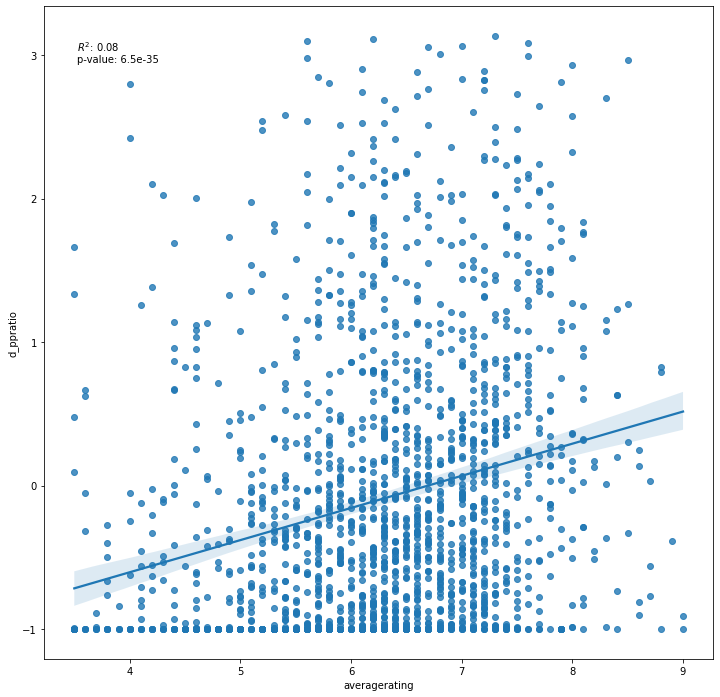

In [179]:
# Assuming 'films_dpp' is your DataFrame and it has 'averagerating' and 'd_ppratio' columns
X = films_dpp['averagerating']
y = films_dpp['ppratio_xform']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the r-squared and p-value
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the slope coefficient

# Set the size of the figure
plt.figure(figsize=(12, 12))

# Create a scatter plot with a regression line
sns.regplot(x='averagerating', y='d_ppratio', data=films_dpp)

# Annotate the plot with the r-squared and p-value
plt.text(0.05, 0.95, f'$R^2$: {r_squared:.2f}\np-value: {p_value:.2g}', 
         ha='left', va='top', transform=plt.gca().transAxes)

# Display the plot
plt.show()

---

---

## Analyzing d_netprofit by averagerating

In [180]:
# get rid of nulls in the ratings columns
films_net = films[films.averagerating.notna()]
films_net.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2019 entries, 14 to 63133
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2019 non-null   object 
 1   year               2019 non-null   float64
 2   runtime_minutes    1963 non-null   float64
 3   genres             1963 non-null   object 
 4   movie_id           1963 non-null   object 
 5   writer             1892 non-null   object 
 6   director           1961 non-null   object 
 7   production_budget  2019 non-null   float64
 8   studio             1181 non-null   object 
 9   averagerating      2019 non-null   float64
 10  numvotes           2019 non-null   float64
 11  actors             1963 non-null   object 
 12  d_netprofit        2019 non-null   float64
 13  d_ppratio          2019 non-null   float64
dtypes: float64(7), object(7)
memory usage: 236.6+ KB


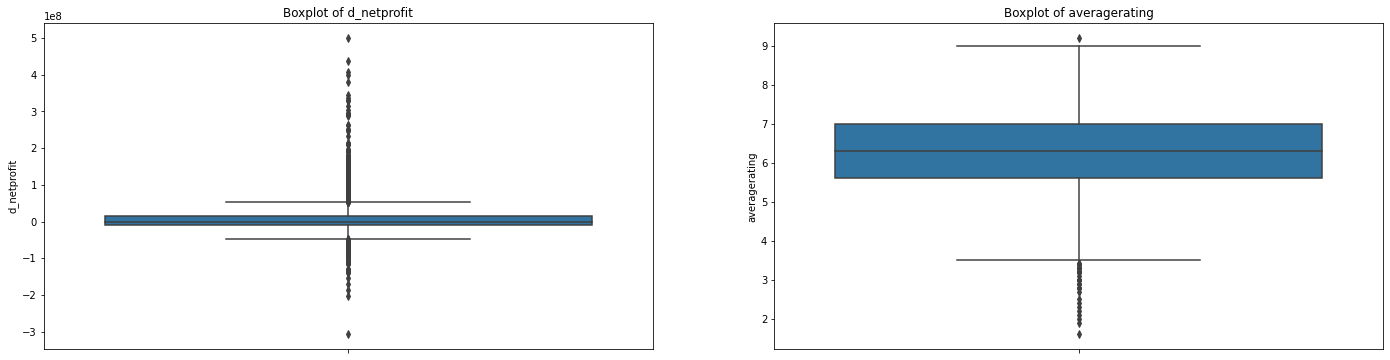

In [181]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(24, 6))

# First subplot for 'd_ppratio'
plt.subplot(1, 2, 1) # (rows, columns, panel number)
sns.boxplot(y='d_netprofit', data=films_net)
plt.title('Boxplot of d_netprofit')

# Second subplot for 'averagerating'
plt.subplot(1, 2, 2) # (rows, columns, panel number)
sns.boxplot(y='averagerating', data=films_net)
plt.title('Boxplot of averagerating')

# Display the plots
plt.show()

In [182]:
films_net = remove_outliers_iqr(films_net, 'd_netprofit')
films_net = remove_outliers_iqr(films_net, 'averagerating')

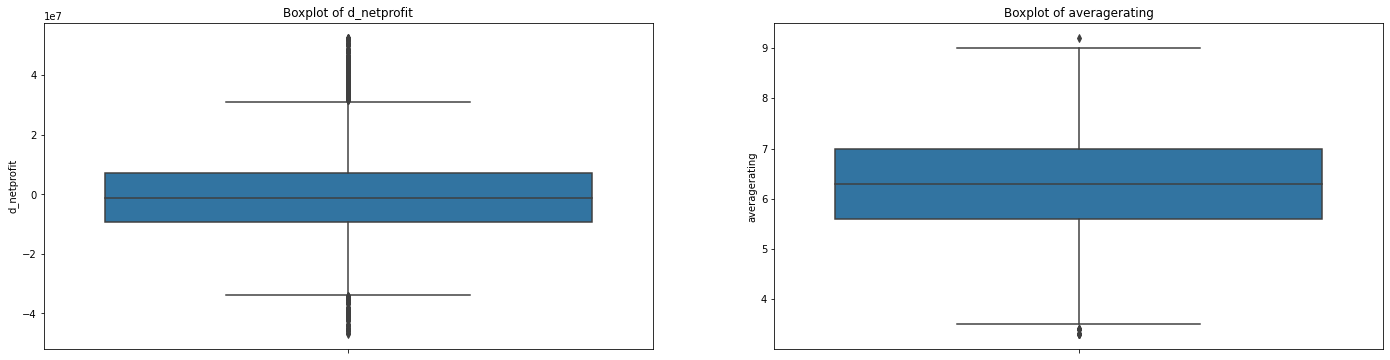

In [183]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(24, 6))

# First subplot for 'd_ppratio'
plt.subplot(1, 2, 1) # (rows, columns, panel number)
sns.boxplot(y='d_netprofit', data=films_net)
plt.title('Boxplot of d_netprofit')

# Second subplot for 'averagerating'
plt.subplot(1, 2, 2) # (rows, columns, panel number)
sns.boxplot(y='averagerating', data=films_net)
plt.title('Boxplot of averagerating')

# Display the plots
plt.show()

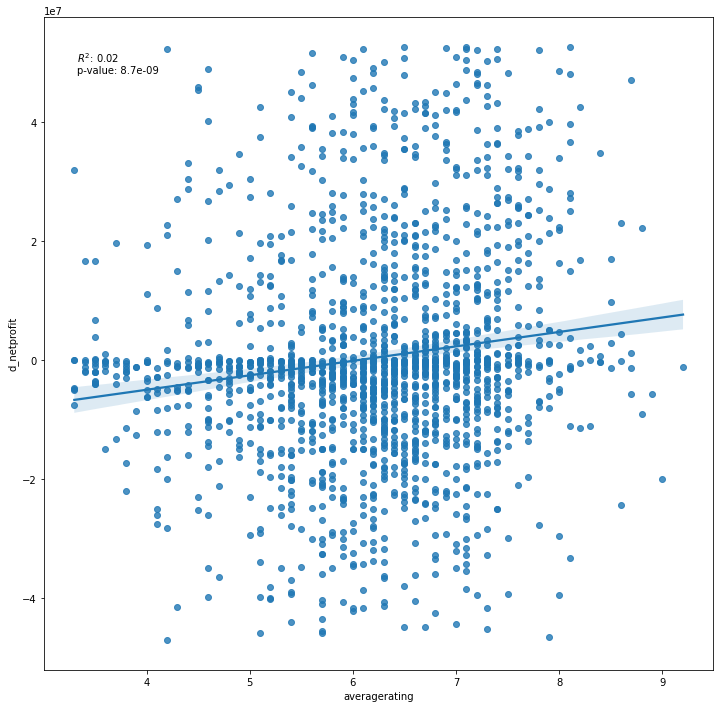

In [184]:
X = films_net['averagerating']
y = films_net['d_netprofit']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the r-squared and p-value
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the slope coefficient

# Set the size of the figure
plt.figure(figsize=(12, 12))

# Create a scatter plot with a regression line
sns.regplot(x='averagerating', y='d_netprofit', data=films_net)

# Annotate the plot with the r-squared and p-value
plt.text(0.05, 0.95, f'$R^2$: {r_squared:.2f}\np-value: {p_value:.2g}', 
         ha='left', va='top', transform=plt.gca().transAxes)

# Display the plot
plt.show()

---

---

## Analyzing d_ppratio by runtime_minutes

In [185]:
# get rid of nulls in the runtime column
films_rt = films[films.runtime_minutes.notna()]
films_rt = films_rt.rename(columns={'runtime_minutes': 'runtime'})
films_rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 14 to 62677
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2036 non-null   object 
 1   year               2036 non-null   float64
 2   runtime            2036 non-null   float64
 3   genres             2035 non-null   object 
 4   movie_id           2036 non-null   object 
 5   writer             1947 non-null   object 
 6   director           2030 non-null   object 
 7   production_budget  2036 non-null   float64
 8   studio             1156 non-null   object 
 9   averagerating      1963 non-null   float64
 10  numvotes           1963 non-null   float64
 11  actors             2036 non-null   object 
 12  d_netprofit        2036 non-null   float64
 13  d_ppratio          2036 non-null   float64
dtypes: float64(7), object(7)
memory usage: 238.6+ KB


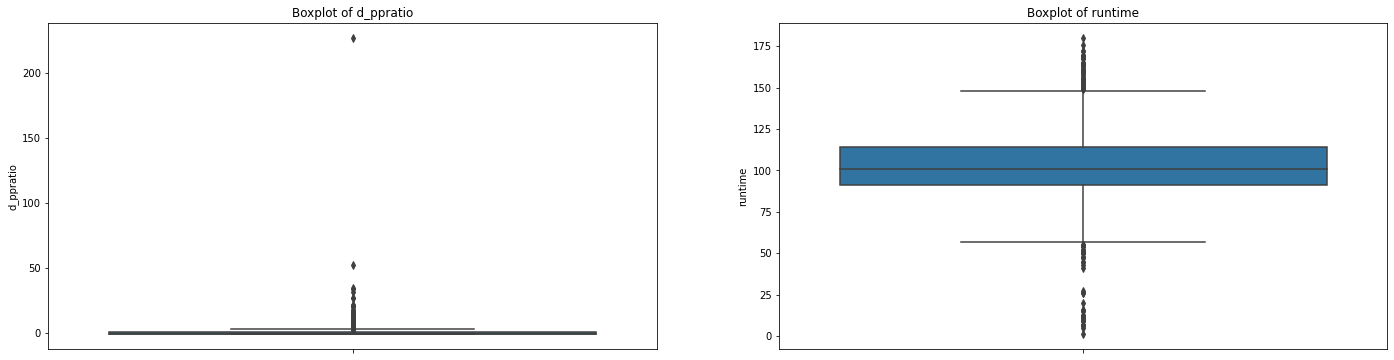

In [186]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(24, 6))

# First subplot for 'd_ppratio'
plt.subplot(1, 2, 1) # (rows, columns, panel number)
sns.boxplot(y='d_ppratio', data=films_rt)
plt.title('Boxplot of d_ppratio')

# Second subplot for 'averagerating'
plt.subplot(1, 2, 2) # (rows, columns, panel number)
sns.boxplot(y='runtime', data=films_rt)
plt.title('Boxplot of runtime')

# Display the plots
plt.show()

In [187]:
films_rt = remove_outliers_iqr(films_rt, 'd_ppratio')
films_rt = remove_outliers_iqr(films_rt, 'runtime')

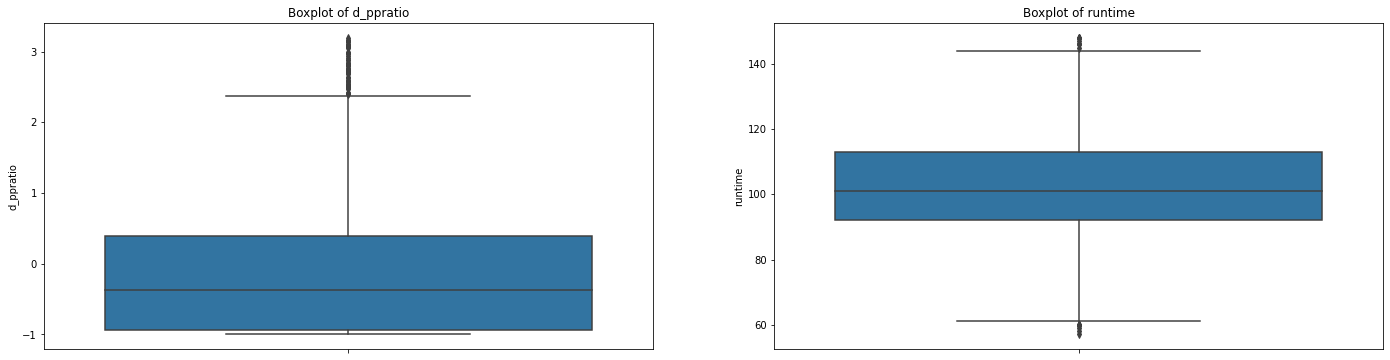

In [188]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(24, 6))

# First subplot for 'd_ppratio'
plt.subplot(1, 2, 1) # (rows, columns, panel number)
sns.boxplot(y='d_ppratio', data=films_rt)
plt.title('Boxplot of d_ppratio')

# Second subplot for 'averagerating'
plt.subplot(1, 2, 2) # (rows, columns, panel number)
sns.boxplot(y='runtime', data=films_rt)
plt.title('Boxplot of runtime')

# Display the plots
plt.show()

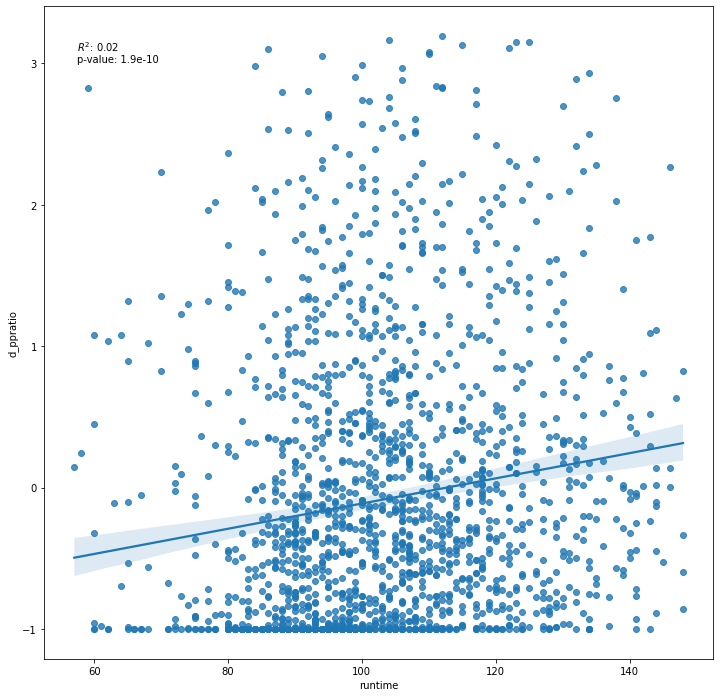

In [189]:
X = films_rt['runtime']
y = films_rt['d_ppratio']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the r-squared and p-value
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the slope coefficient

# Set the size of the figure
plt.figure(figsize=(12, 12))

# Create a scatter plot with a regression line
sns.regplot(x='runtime', y='d_ppratio', data=films_rt)

# Annotate the plot with the r-squared and p-value
plt.text(0.05, 0.95, f'$R^2$: {r_squared:.2f}\np-value: {p_value:.2g}', 
         ha='left', va='top', transform=plt.gca().transAxes)

# Display the plot
plt.show()